In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(
    "../co2/co2_mm_mlo.csv", 
    # skiprows=40,
    comment='#'
)

FileNotFoundError: [Errno 2] No such file or directory: '../co2/co2_mm_mlo.csv'

In [12]:
df.head(3)

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99


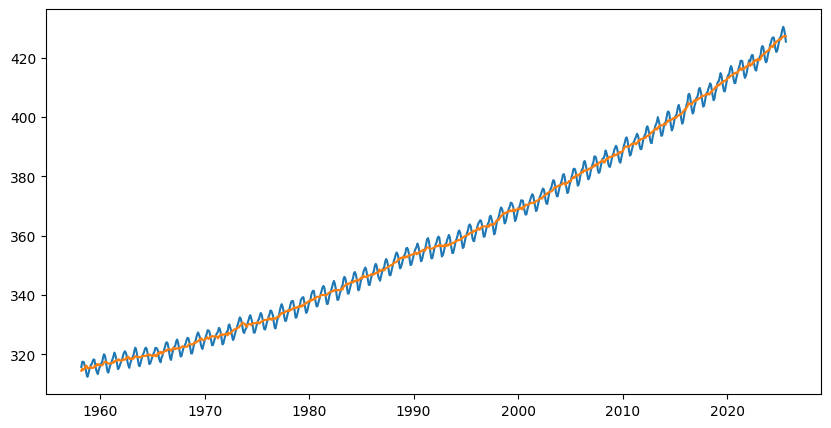

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(df['decimal date'].values, df['average'].values)
ax.plot(df['decimal date'].values, df['deseasonalized'].values)
# ax.set_xlim(1960, 1965)
# ax.set_ylim(310, 330)

## Create a system: Gm = d

In [38]:
time = df['decimal date'].values
time-=time.min()


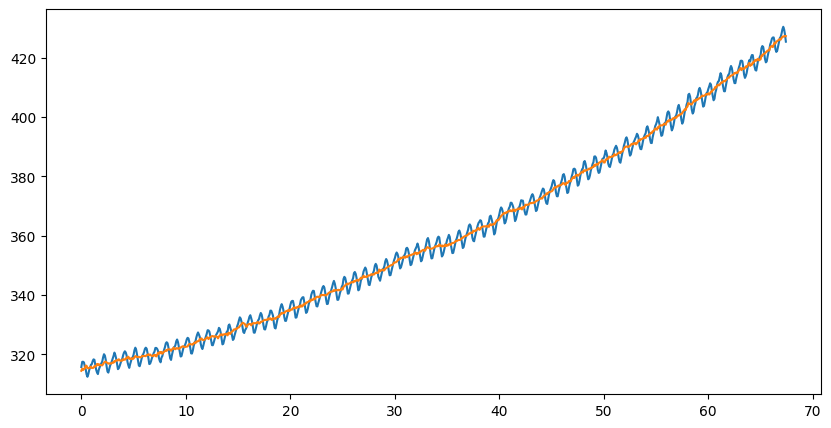

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(time, df['average'].values)
ax.plot(time, df['deseasonalized'].values)
# ax.set_xlim(1960, 1965)
# ax.set_ylim(310, 330)

In [72]:
nt = len(time)
e = np.ones(nt)


In [73]:
b = df['deseasonalized'].values[0]
a = 2.5

In [74]:
G = np.c_[time, e]
m = np.array([a, b])

In [75]:
d = G @ m
GtGinv = np.linalg.inv(G.T @ G)

In [71]:
m_est = np.linalg.solve(G.T @ G, G.T @ df['average'].values)

In [66]:
m_est = GtGinv @ (G.T @ df['average'].values )

In [67]:
m_est

array([  1.65537073, 304.55659408])

In [68]:
d_est = G @ m_est

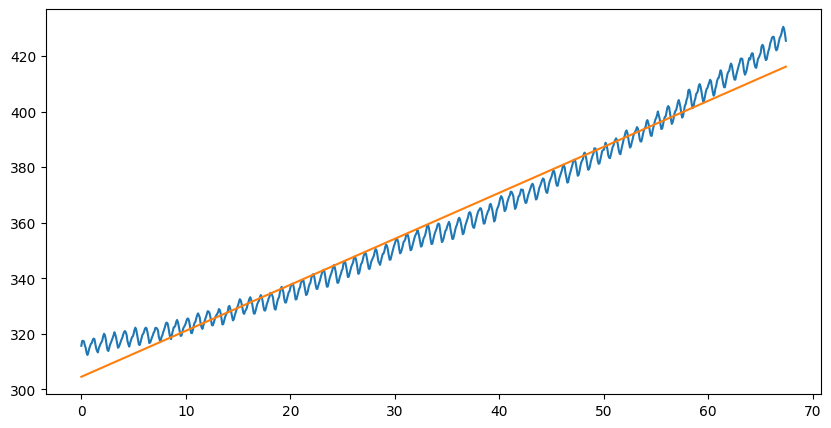

In [69]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(time, df['average'].values)
ax.plot(time, d_est)
# ax.set_xlim(1960, 1965)
# ax.set_ylim(310, 330)

In [59]:
# 1/12 * 3 - 1/12 * 0.5

In [58]:
# df['decimal date'].values